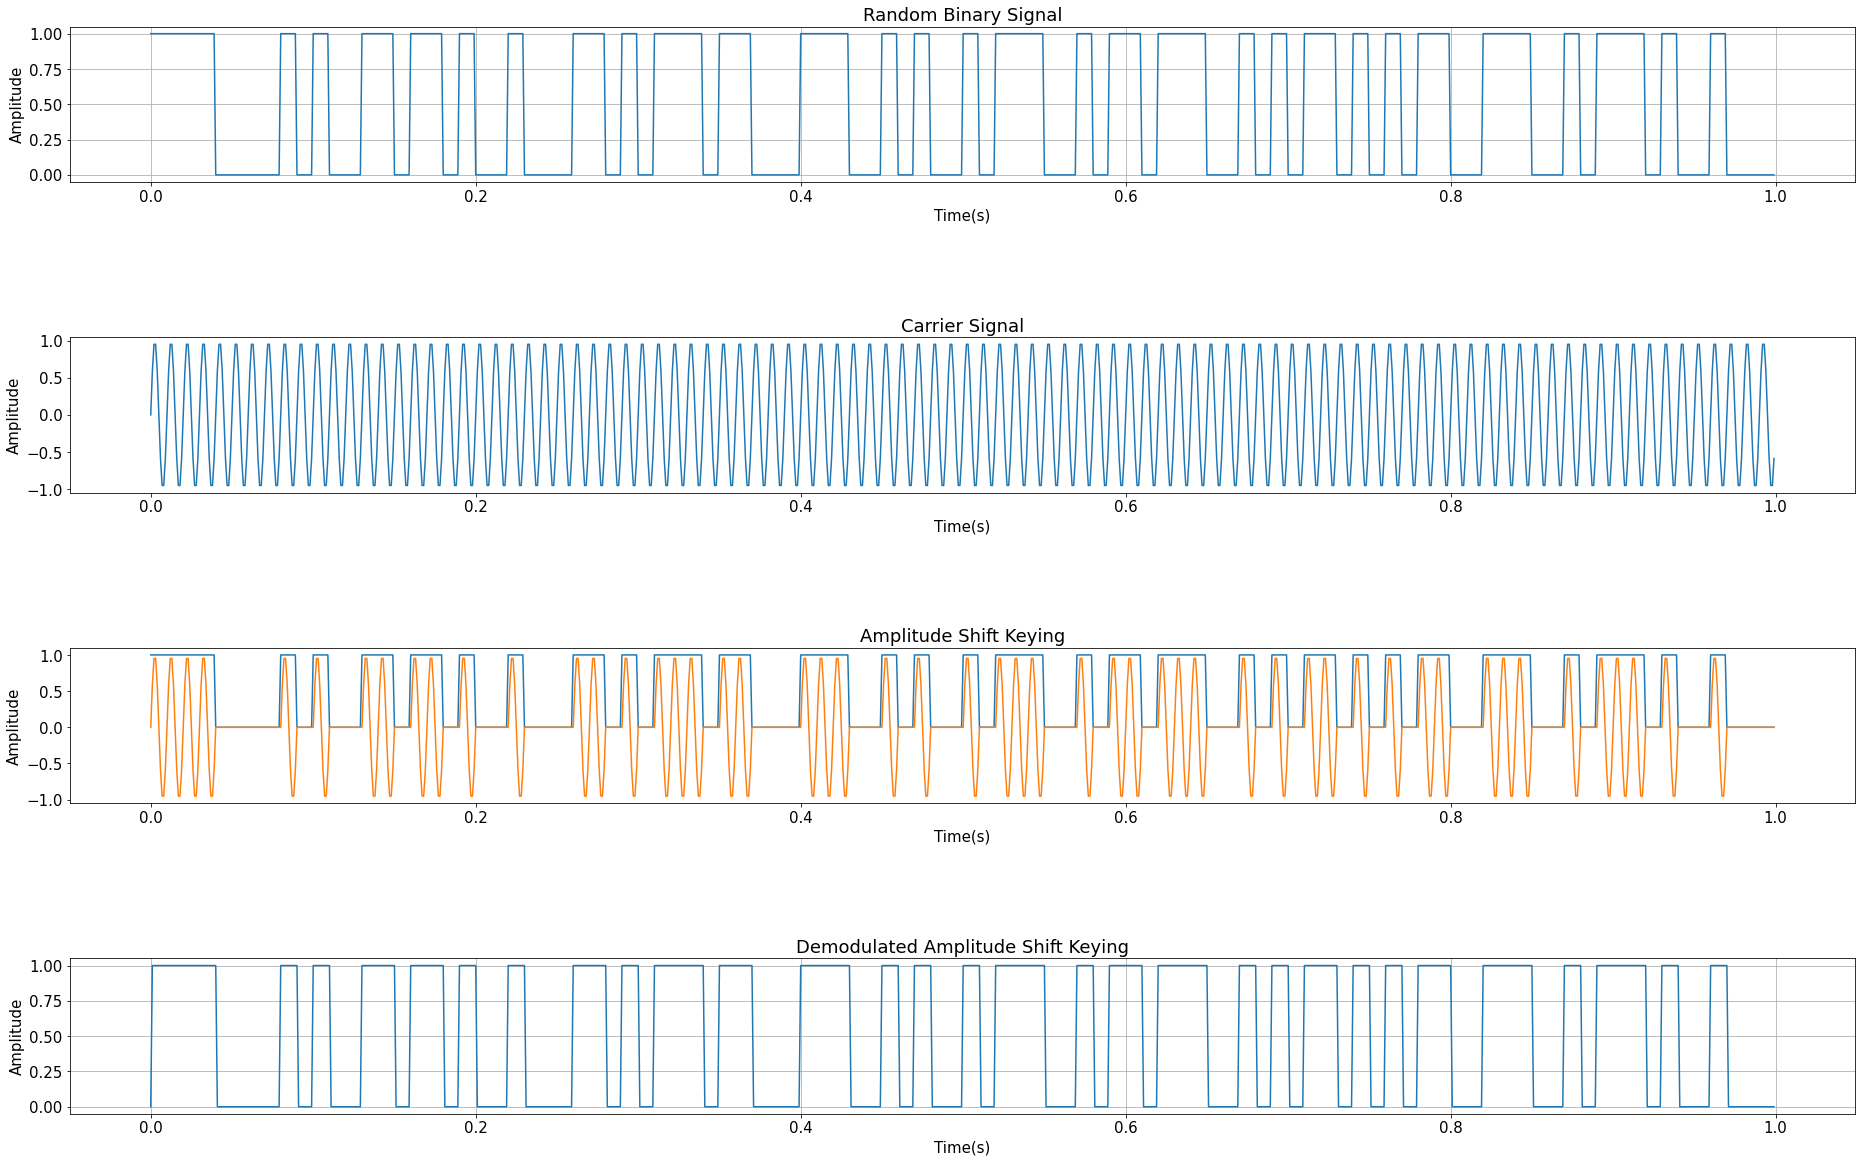

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.signal import butter, filtfilt

def random_binary_signal(sym, samples):
    sym_len = sym
    no_sym = samples
    rand_n = np.random.rand(no_sym)

    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n < 0.5)] = 0

    sig = np.zeros(sym_len*no_sym)

    id_n = np.where(rand_n == 1)

    for i in id_n[0]:
        temp = int(i*sym_len)
        sig[temp:temp+sym_len] = 1
    return sig

Fs = 1000  # sampling frequency
fc = 100  # carrier frequency
T = 1  # simulation time (sec)
t = np.arange(0, T, 1/Fs)

x = np.sin(2*pi*fc*t)

Td = 0.1  # Bit duration
samples = int(Td * Fs)  # samples in one bit
sym = int(np.floor(np.size(t)/samples))

sig = random_binary_signal(sym, samples)

ask = x * sig

# plot
plt.subplot(4, 1, 1)
plt.plot(t, sig)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Random Binary Signal')
plt.grid()

# Generate ASK
plt.subplot(4, 1, 2)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Carrier Signal')


plt.subplot(4, 1, 3)
plt.plot(t, sig)
plt.plot(t, ask)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Amplitude Shift Keying')

ask = np.abs(ask)
b, a = butter(5, 0.2)
s2 = filtfilt(b, a, ask)
ask2 = []
for i in s2:
    if i > 0.25:
        ask2.append(1)
    else:
        ask2.append(0)
        
ask2 = np.asanyarray(ask2)

plt.subplot(4, 1, 4)
plt.plot(t, ask2)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Demodulated Amplitude Shift Keying')


plt.grid()
plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(32, 20)


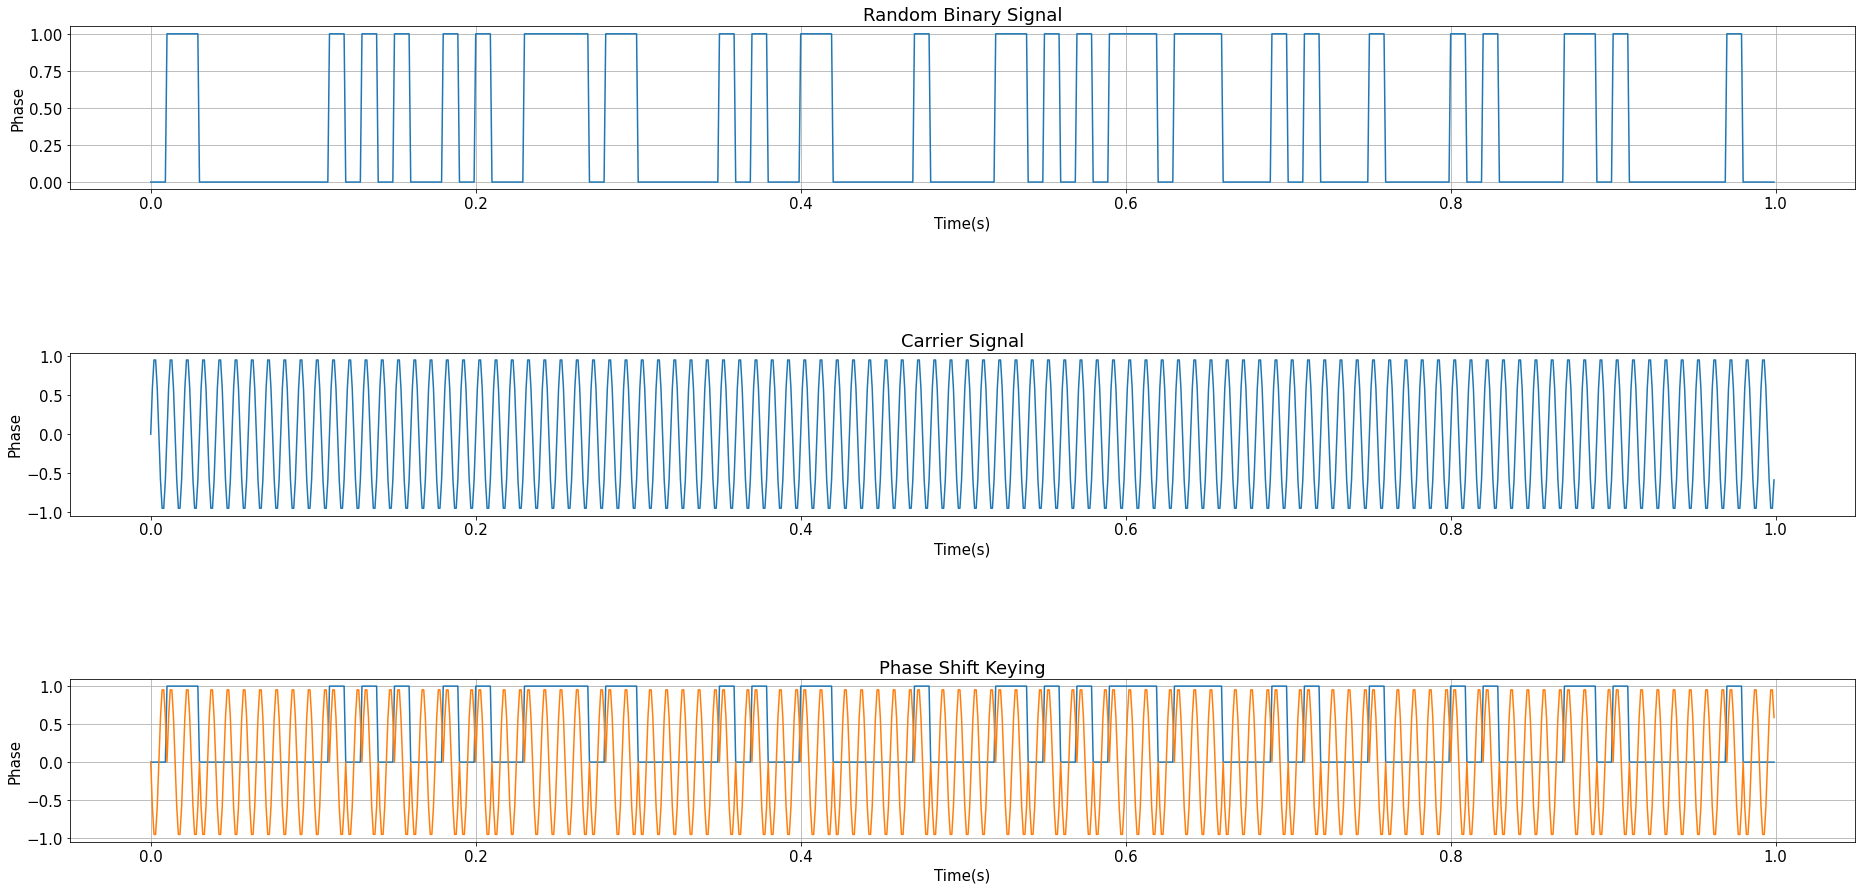

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.signal import butter, filtfilt

def random_binary_signal(sym, samples):
    sym_len = sym
    no_sym = samples
    rand_n = np.random.rand(no_sym)

    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n < 0.5)] = 0

    sig = np.zeros(sym_len*no_sym)

    id_n = np.where(rand_n == 1)

    for i in id_n[0]:
        temp = int(i*sym_len)
        sig[temp:temp+sym_len] = 1
    return sig

Fs = 1000  # sampling frequency
fc = 100  # carrier frequency
T = 1  # simulation time (sec)
t = np.arange(0, T, 1/Fs)
x = np.sin(2*pi*fc*t)

Td = 0.1  # Bit duration
samples = int(Td * Fs)  # samples in one bit
sym = int(np.floor(np.size(t)/samples))

sig = random_binary_signal(sym, samples)
psk = np.zeros(len(sig))
for i in range(len(sig)):
    if sig[i] > 0:
        psk[i] = x[i]*1
    else:
        psk[i] = x[i]*-1

# plot
plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.xlabel('Time(s)')
plt.ylabel('Phase')
plt.title('Random Binary Signal')
plt.grid()

# Generate ASK
plt.subplot(3, 1, 2)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Phase')
plt.title('Carrier Signal')


plt.subplot(3, 1, 3)
plt.plot(t, sig)
plt.plot(t, psk)
plt.xlabel('Time(s)')
plt.ylabel('Phase')
plt.title('Phase Shift Keying')

plt.grid()
plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(32, 15)
